# Assignment-04-Simple Linear Regression-2

In [1]:
# impoort libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (10,5)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# import dataset
dataset=pd.read_csv('Salary_Data.csv')
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


## EDA and Data Visualization

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [4]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<Axes: >

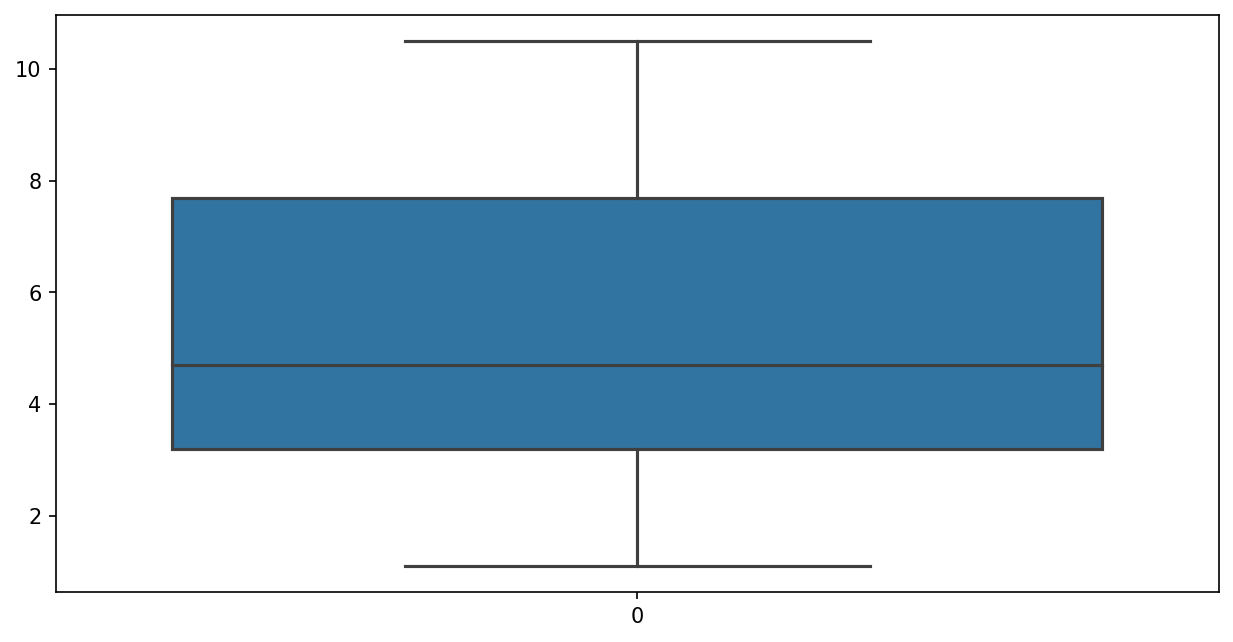

In [5]:
sns.boxplot(data=dataset['YearsExperience'])

<Axes: >

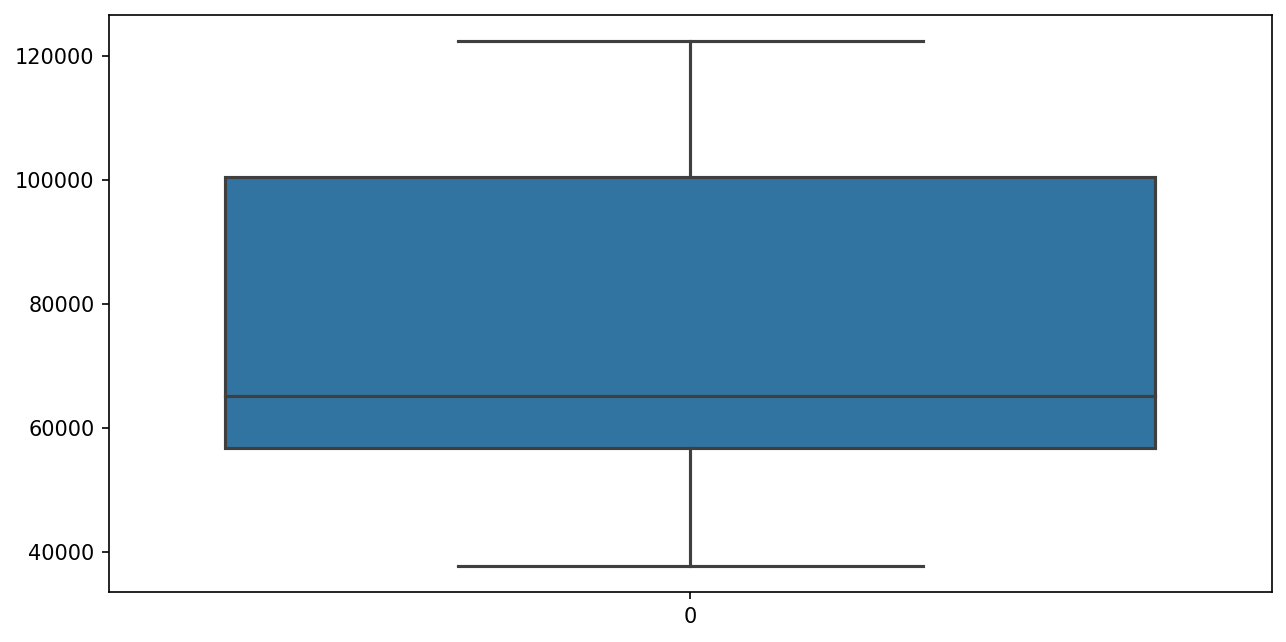

In [6]:
sns.boxplot(data=dataset['Salary'])

<Axes: xlabel='YearsExperience', ylabel='Density'>

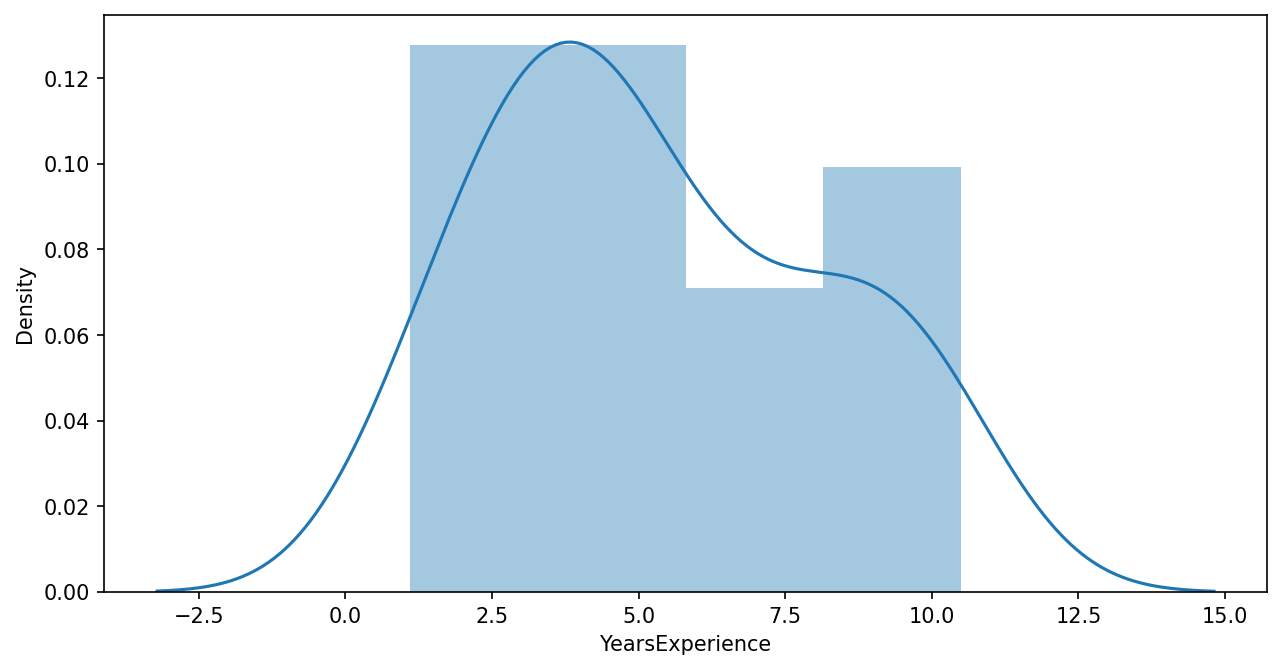

In [7]:
sns.distplot(dataset['YearsExperience'])

<Axes: xlabel='Salary', ylabel='Density'>

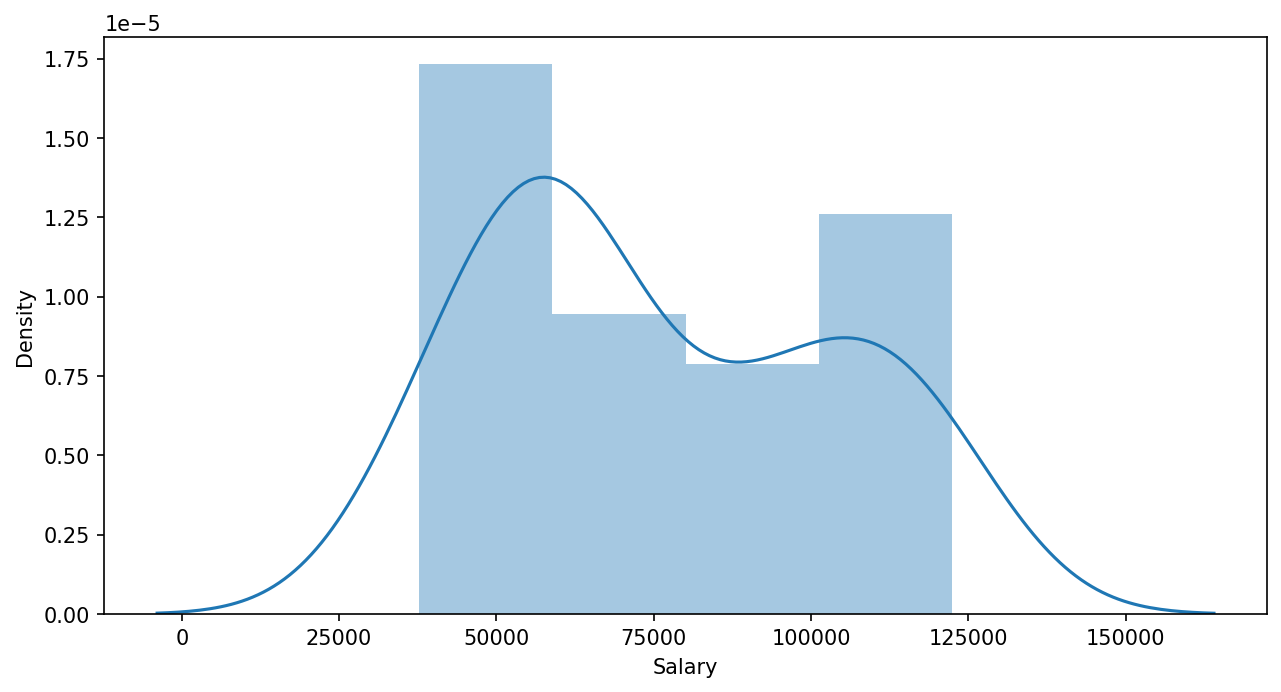

In [8]:
sns.distplot(dataset['Salary'])

## Correlation Analysis

In [9]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='YearsExperience', ylabel='Salary'>

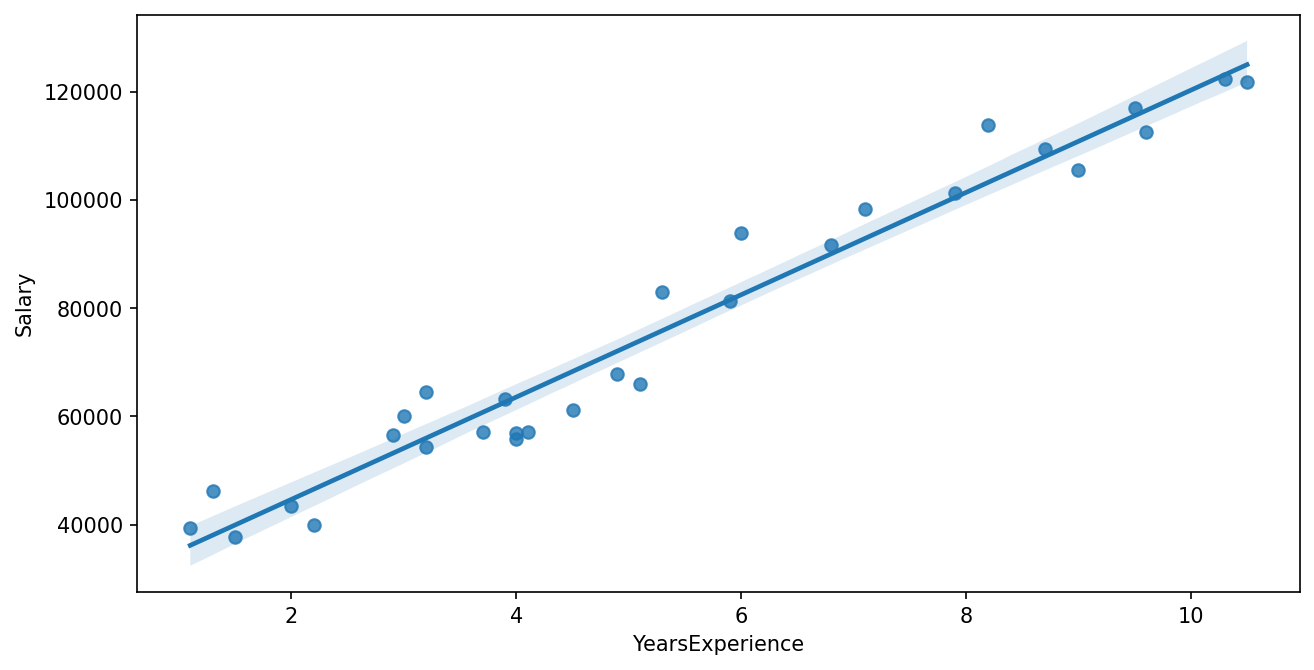

In [10]:
sns.regplot(x=dataset['YearsExperience'],y=dataset['Salary'])

## Model Building

In [11]:
model=smf.ols("Salary~YearsExperience",data=dataset).fit()

## Model Testing

In [12]:
# Finding Cefficient Parameters
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [13]:
# Finding Pvalues and tvalues
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [14]:
# Finding Rsquared values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

## Model Predictions

In [15]:
# Manual prediction for say 3 Years Experience
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [16]:
# Automatic Prediction for say 3 & 5 Years Experience 

In [17]:
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [18]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5


In [19]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64